In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## DATA PREPROCESSING

In [3]:
df.columns = (
    df.columns
    .str.strip()
    .str.replace(" ", "_")
    .str.lower()
)

In [4]:
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df["age"] = df["age"].fillna(
                df['age'].mean()
            )

In [8]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [9]:
df.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         0
dtype: int64

In [10]:
df

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          891 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

df = df.drop(['name', 'ticket', 'cabin'], axis=1, errors='ignore')

## Checking data by column

In [13]:
df["age"].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [14]:
df["fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

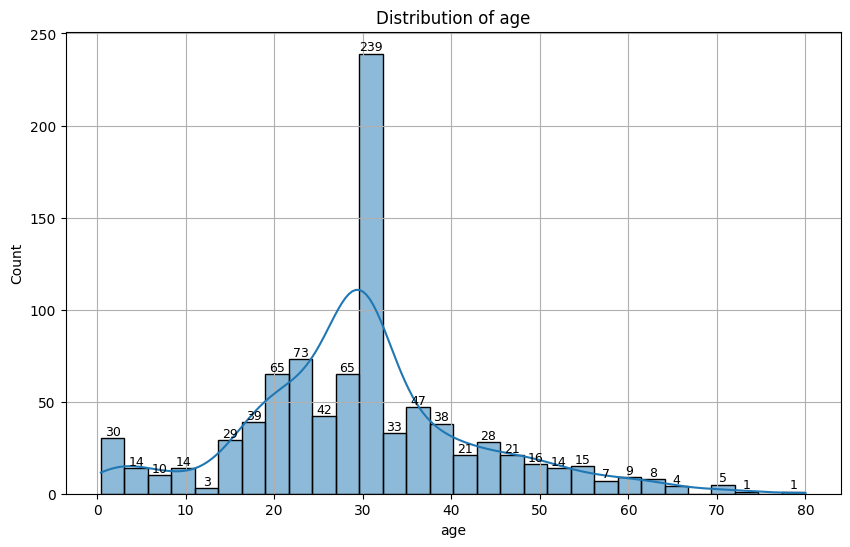

In [15]:
plt.figure(figsize = (10,6))

ax = sns.histplot(
        df["age"],
        kde = True
    )
    
for bar in ax.patches:
    height = int(bar.get_height())
    if height > 0:
        ax.annotate(height, xy=(bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9, color='black')
        
plt.title("Distribution of age")      
plt.grid(True)
plt.show()

In [16]:
df['sex'].value_counts()

sex
0    577
1    314
Name: count, dtype: int64

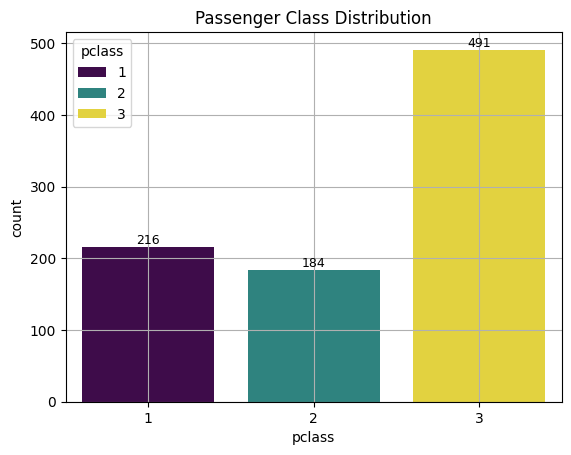

In [17]:
ax = sns.countplot(
        x='pclass',
        data=df,
        hue = df['pclass'],
        palette = 'viridis'
    )

for bar in ax.patches:
    height = int(bar.get_height())

    if height>0:
        ax.annotate(height, xy=(bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9, color='black')

plt.title("Passenger Class Distribution")
plt.grid(True)

plt.show()

## BIVARIATE ANALYSIS

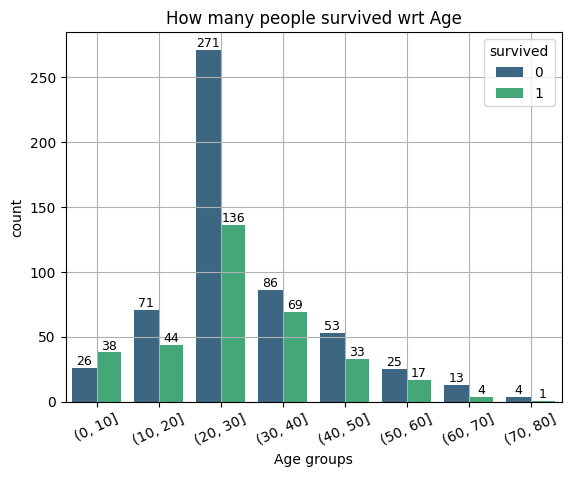

In [18]:
# Age vs survived

df["age_bin"] = pd.cut(df["age"], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

ax = sns.countplot(
        data = df,
        x = 'age_bin',
        hue = 'survived',
        palette = 'viridis'
    )

for bar in ax.patches:
    height = int(bar.get_height())
    if height>0:
        ax.annotate(height, xy=(bar.get_x() + bar.get_width()/2, height),
                     ha = 'center', va = 'bottom', fontsize = 9)

plt.xlabel("Age groups")
plt.xticks(rotation = 25)
plt.title("How many people survived wrt Age")
plt.grid(True)
plt.show()

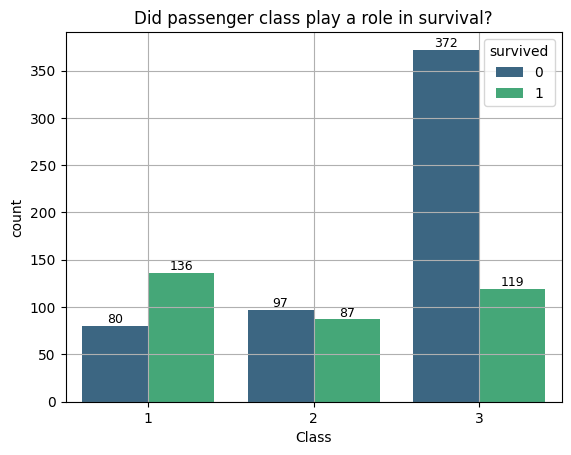

In [19]:
# Passanger class vs survived
ax = sns.countplot(
    data = df,
    x = 'pclass',
    hue = 'survived',
    palette = 'viridis'
)

for bar in ax.patches:
    height = int(bar.get_height())
    if height>0:
        ax.annotate(height, xy = (bar.get_x() + bar.get_width()/2, height),
                     ha = 'center', va = 'bottom', fontsize = 9)
        
plt.title("Did passenger class play a role in survival?")
plt.xlabel("Class")

plt.grid(True)
plt.show()

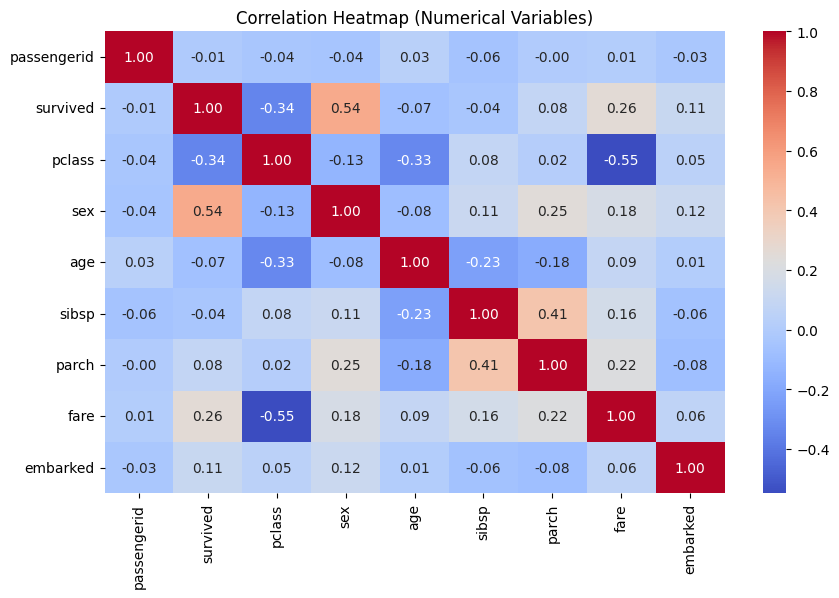

In [20]:
num_cols = df.select_dtypes(include=['int64', 'float64'])

corr = num_cols.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Variables)")
plt.show()

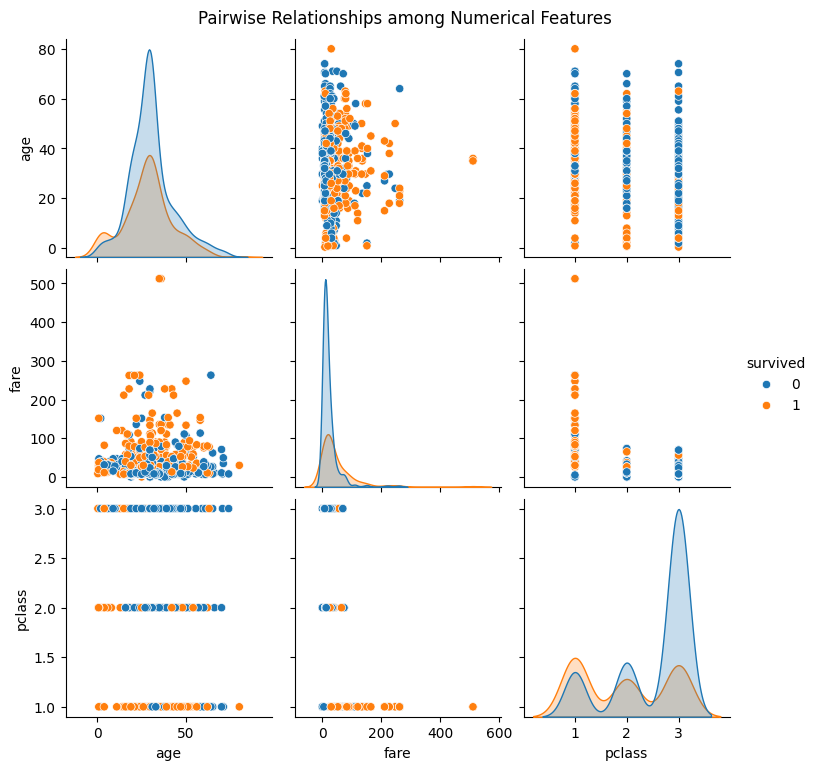

In [21]:
# Pairplot for numerical variables
sns.pairplot(df, vars=['age', 'fare', 'pclass'], hue='survived')
plt.suptitle("Pairwise Relationships among Numerical Features", y=1.02)
plt.show()

## Building Model

In [74]:
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'family_size', 'is_alone', 'fare_per_person']].values
y = df['survived'].values.reshape(-1, 1)

In [75]:
y = df['survived'].values.reshape(-1, 1)

np.random.seed(42)
indices = np.random.permutation(len(X))
split = int(0.8 * len(X))
train_idx, test_idx = indices[:split], indices[split:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)
X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std

In [76]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_pred):
    m = len(y)
    return - (1/m) * np.sum(y*np.log(y_pred + 1e-9) + (1-y)*np.log(1 - y_pred + 1e-9))

def gradient_descent(X, y, alpha=0.01, iterations=3000, tol=1e-6, print_every=200):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]   
    theta = np.zeros((n + 1, 1))
    losses = []
    
    for i in range(iterations):
        h = sigmoid(X_b @ theta)
        loss = compute_loss(y, h)
        losses.append(loss)
        
        grad = (1 / m) * (X_b.T @ (h - y))
        theta -= alpha * grad
        
        if np.linalg.norm(grad) < tol:
            print(f"Early stopping at iteration {i}, gradient norm below tolerance.")
            break

        if i % print_every == 0:
            print(f"Iteration {i}: Loss = {loss:.4f}")
    
    return theta, losses

In [77]:
theta, losses = gradient_descent(X_train, y_train, alpha=0.0005, iterations=8000)

Iteration 0: Loss = 0.6931
Iteration 200: Loss = 0.6786
Iteration 400: Loss = 0.6654
Iteration 600: Loss = 0.6532
Iteration 800: Loss = 0.6421
Iteration 1000: Loss = 0.6319
Iteration 1200: Loss = 0.6224
Iteration 1400: Loss = 0.6137
Iteration 1600: Loss = 0.6056
Iteration 1800: Loss = 0.5980
Iteration 2000: Loss = 0.5910
Iteration 2200: Loss = 0.5845
Iteration 2400: Loss = 0.5783
Iteration 2600: Loss = 0.5726
Iteration 2800: Loss = 0.5672
Iteration 3000: Loss = 0.5621
Iteration 3200: Loss = 0.5573
Iteration 3400: Loss = 0.5528
Iteration 3600: Loss = 0.5486
Iteration 3800: Loss = 0.5445
Iteration 4000: Loss = 0.5407
Iteration 4200: Loss = 0.5371
Iteration 4400: Loss = 0.5337
Iteration 4600: Loss = 0.5304
Iteration 4800: Loss = 0.5273
Iteration 5000: Loss = 0.5244
Iteration 5200: Loss = 0.5216
Iteration 5400: Loss = 0.5189
Iteration 5600: Loss = 0.5163
Iteration 5800: Loss = 0.5139
Iteration 6000: Loss = 0.5116
Iteration 6200: Loss = 0.5093
Iteration 6400: Loss = 0.5072
Iteration 6600: L

In [78]:
def predict_proba(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return sigmoid(X_b @ theta)

def predict(X, theta, threshold=0.5):
    return (predict_proba(X, theta) >= threshold).astype(int)

y_pred = predict(X_test, theta)

In [79]:
accuracy = np.mean(y_pred == y_test) * 100
print(f"\nModel Accuracy on Test Set: {accuracy:.2f}%")


Model Accuracy on Test Set: 81.01%


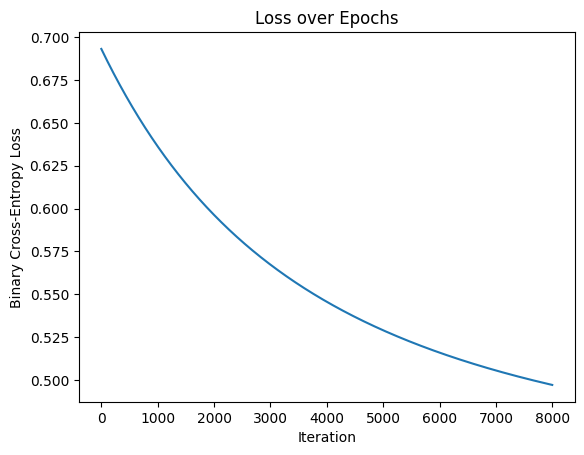

In [73]:
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Iteration")
plt.ylabel("Binary Cross-Entropy Loss")
plt.show()